<p style="font-size:250%" ><b>Plant Biology 2020 Workshop</b</p>
<p style="font-size:175%" >How Machine Learning can be used to solve plant biology problems</p>

* Time/date: 3:30-4:30pm, 7/29/20 (US Eastern time)
* Instructors
  * Shin-Han Shiu and Serena Lotreck, Michigan State University

# __The five steps workflow__

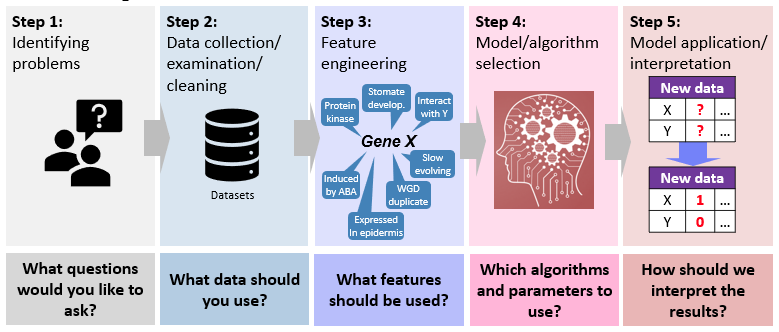

# __Step 1. Turning biological questions into ML problems__

## Biological question

<div class="alert alert-block alert-success">
<b>What kinds of paralogous gene pairs tend to have strong fitness effects when mutated?</b>
</div>

## Machine learning problem

Focus on regression

<div class="alert alert-block alert-warning">
<b>How can we build a machine learning model to predict fitness of gene pairs when they are mutated?</b>
</div>

# __Step 2. Data collection and processing__

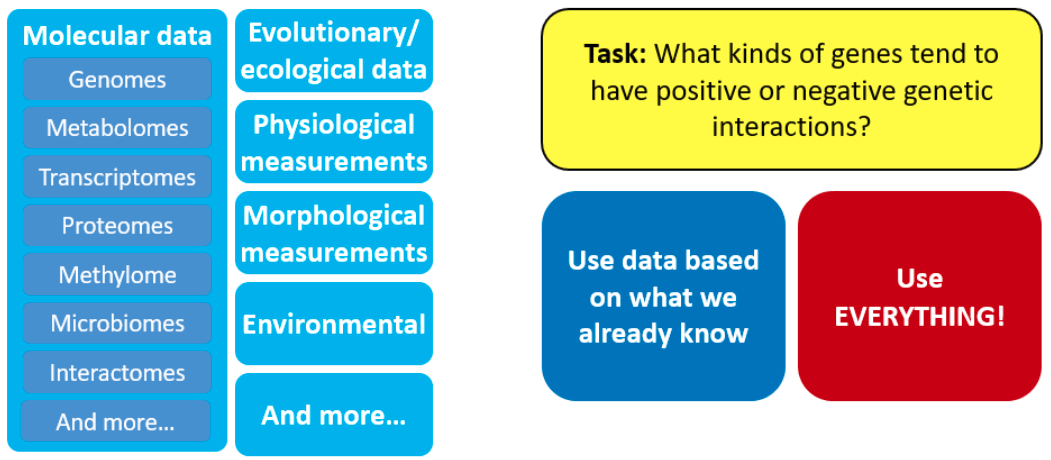

## __2.1 Load data__

### Specify where data is

In [3]:
from pathlib import Path 

data_file = Path("./data/matrix_dm-fitness_features_modnames.csv")

### Read the data into a table

Use the read_csv function:
* Specify the character that separated the different columns (delimiter) to be tab ("\t").

In [4]:
import pandas as pd     

# Read the comma-delimited file (csv) into a data frame (df)
df = pd.read_csv(data_file) 

## __2.2 Quick look at the data content__

### Check how many rows and columns

There are:
* 8160 rows
* 102 columns

In [5]:
df.shape

(8160, 102)

### Look at the first few rows of the data

Note that some cells do not have value:
* NaN: not a number

In [6]:
df.head()

,index,fitness,GOslim_num_overlap,GOslim_%_overlap,full_GO_num_overlap,full_GO_%_overlap,PPI_total,PPI_num_overlap,PPI_%_overlap,37C_ORF_Chz1_reg_bind_max,...,25C_TSS_Bur6_reg_bind_difference,25C_ORF_Uga3_reg_bind_max,GO_PCA_Dim1,GO_PCA_Dim3,GO_PCA_Dim4,SM_max_fitness,SM_min_fitness,SM_fitness_difference,SM_fitness_avg,SM_fitness_total
0,0,0.8098,NaN,28.571429,2.0,33.333333,6.0,0.0,0.000000,-0.72,...,7.000000e-01,0.67,-0.998186,0.875158,-0.168471,1.0385,0.7056,0.3329,0.87205,1.7441
1,1,1.0400,4.0,NaN,1.0,14.285714,19.0,0.0,0.000000,-0.40,...,5.100000e-01,0.31,-1.393140,1.317389,-0.398198,1.0130,1.0117,0.0013,1.01235,2.0247
2,2,0.9143,2.0,25.000000,3.0,NaN,15.0,1.0,6.666667,0.58,...,5.551115e-17,-0.51,-1.278924,1.515681,0.788125,0.9945,0.9065,0.0880,0.95050,1.9010
3,3,0.9395,4.0,50.000000,4.0,33.333333,17.0,0.0,0.000000,0.36,...,1.010000e+00,0.08,-1.499192,-3.729416,0.254523,1.0455,0.9920,0.0535,1.01875,2.0375
4,4,0.9792,4.0,100.000000,8.0,66.666667,61.0,0.0,0.000000,0.63,...,1.900000e-01,0.02,0.102606,-0.448486,-0.740647,1.0292,1.0003,0.0289,1.01475,2.0295


### List the fist 10 columns

In [7]:
list(df)[:10]

['index',
 'fitness',
 'GOslim_num_overlap',
 'GOslim_%_overlap',
 'full_GO_num_overlap',
 'full_GO_%_overlap',
 'PPI_total',
 'PPI_num_overlap',
 'PPI_%_overlap',
 '37C_ORF_Chz1_reg_bind_max']

## __2.3 Summarize the data a bit__

### Get a sense of what types of data are in the table

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8160 entries, 0 to 8159
Columns: 102 entries, index to SM_fitness_total
dtypes: float64(101), int64(1)
memory usage: 6.4 MB


### Look at summary statistics of the data

In [7]:
# Just look at a few columns
columns = ['fitness', 'GOslim_num_overlap', 'PPI_total']

df[columns].describe()

,fitness,GOslim_num_overlap,PPI_total
count,8160.000000,8159.000000,8160.000000
mean,0.872332,3.963108,87.969853
std,0.214833,2.042089,97.874829
min,-0.092400,0.000000,1.000000
25%,0.801400,3.000000,34.000000
50%,0.955950,4.000000,53.000000
75%,1.014100,5.000000,105.000000
max,1.279900,18.000000,922.000000


### Look at distribution and relationships

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDAF13B608>,
      dtype=object)

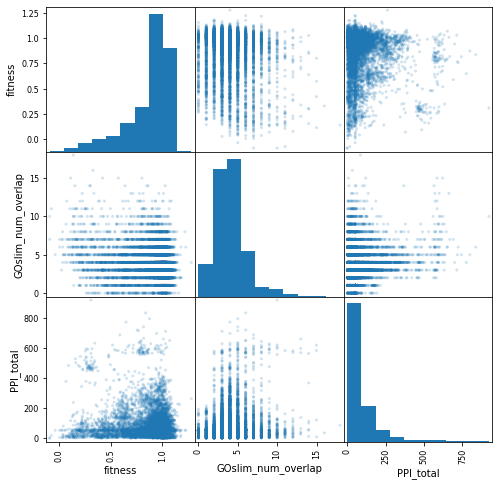

In [8]:
pd.plotting.scatter_matrix(df[columns], figsize=(8,8), alpha=0.2)

### See if some features are correlated with each other

In [9]:
df[['GOslim_num_overlap', 'PPI_total']].corr(method="spearman")

,GOslim_num_overlap,PPI_total
GOslim_num_overlap,1.000000,0.058363
PPI_total,0.058363,1.000000


## __2.4 Rescale data__

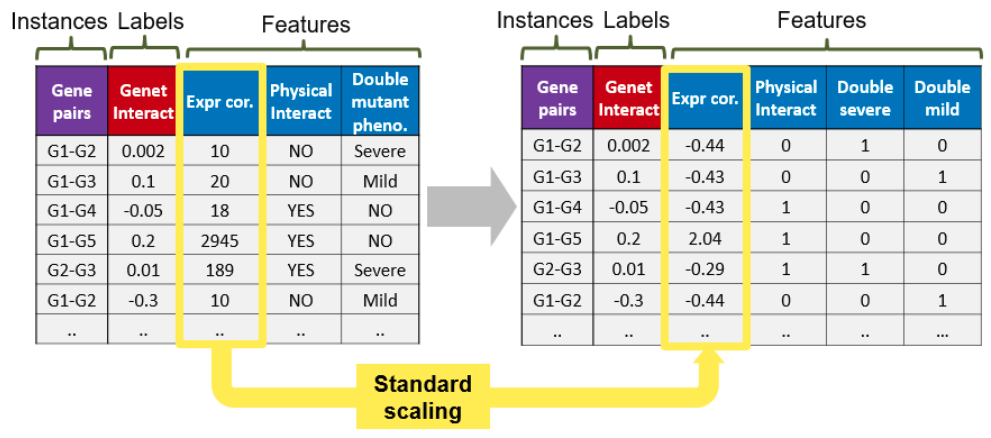

### Specify labels (y) and features (X)

* Labels (y) are in the second column.
* Features (X) are in the columns after y.

In [10]:
df.iloc[:3, :5] # Look at the first 3 rows and the first 5 columns

,index,fitness,GOslim_num_overlap,GOslim_%_overlap,full_GO_num_overlap
0,0,0.8098,NaN,28.571429,2.0
1,1,1.0400,4.0,NaN,1.0
2,2,0.9143,2.0,25.000000,3.0


In [11]:
y = df.iloc[:, 1].to_numpy() # col index=1 --> fitness, labels
X = df.iloc[:, 2:-5]         # col index=2 till before the last 5 -> features

X.shape, y.shape

((8160, 95), (8160,))

### Using the StandardScaler

Standardize features by removing the mean and scaling to unit variance

In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# Fit/transform training data
X_scale = std_scaler.fit_transform(X)  

X_scale.shape

(8160, 95)

### Effect of standard scaling

Using PPI_overlap as an example

Text(0.5, 0, 'standardized PPI_num_overlap')

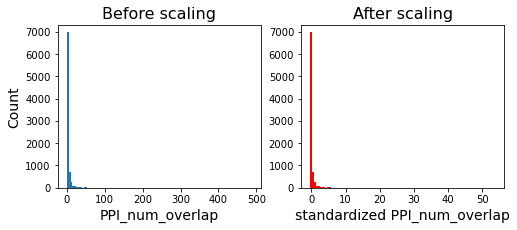

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.hist(X['PPI_num_overlap'], bins=100)
plt.title("Before scaling", fontsize=16)
plt.xlabel("PPI_num_overlap", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.subplot(122)
plt.hist(X_scale[:,5], bins=100, color="red")
plt.title("After scaling", fontsize=16)
plt.xlabel("standardized PPI_num_overlap", fontsize=14)

<div class="alert alert-danger">
    <strong>CAUTION:</strong> There are many ways to scale the data. To make sure the best approach is used, it is a good practice to use multiple approaches and build a model for each to evaluate which one is the best. It is also possible that it is the best without any scaling.
</div>

## __2.5 Deal with missing data__

### Recall some data is missing

In [14]:
X_scale[:3,:5] # The first 3 rows of the first 5 columns

array([[        nan, -0.31094602, -1.18259597, -0.10537074, -0.83754809],
       [ 0.01806681,         nan, -1.51747879, -0.9703313 , -0.70471724],
       [-0.96138252, -0.47237288, -0.84771316,         nan, -0.74558827]])

### Imputation

Note that only features (X) are imputed. 
* Because here labels (y) do not have missing information.
* Also, if any y is missing, they should be dropped.

In [15]:
from sklearn.impute import SimpleImputer

# Using medians to fill missing data
imputer = SimpleImputer(strategy="median") 

# Fit and transform training data
X_impute = imputer.fit_transform(X_scale)   

X_impute[:3,:5]

array([[ 0.01806681, -0.31094602, -1.18259597, -0.10537074, -0.83754809],
       [ 0.01806681, -0.24637528, -1.51747879, -0.9703313 , -0.70471724],
       [-0.96138252, -0.47237288, -0.84771316, -0.17417442, -0.74558827]])

<div class="alert alert-danger">
    <strong>CAUTION:</strong> There are many ways to deal with missing data. To make sure the best approach is used, it is a good practice to use multiple approaches and build a model for each to evaluate which one is the best.
</div>

## __2.6 Separate training and testing data__

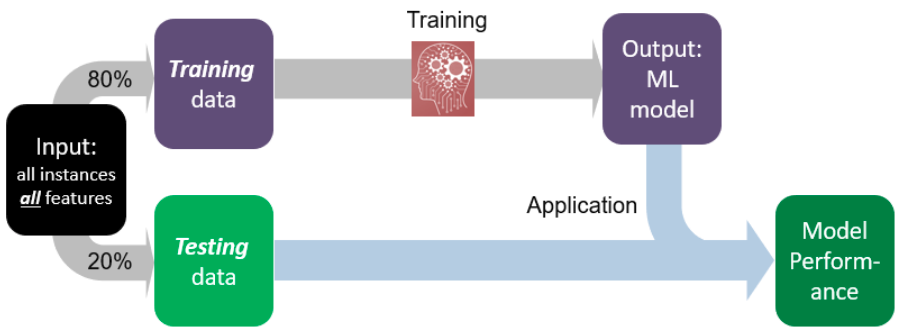

### Specify random seed number for reproducibility

In [16]:
rand_seed = 20200729

### Split data with train_test_split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_impute,              # Scaled and imputed feature values 
    y,                     # labels
    test_size=0.2,         # 20% are for testing
    random_state=rand_seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6528, 95), (1632, 95), (6528,), (1632,))

# __Step 3. Feature engineering__

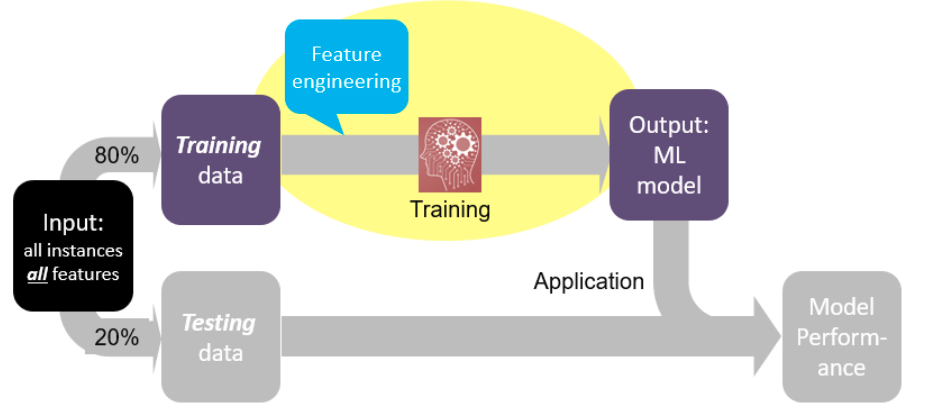

## __3.1 Train a preliminary model__

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Create a LassoCV model object with default parameters
rf_reg = RandomForestRegressor(n_jobs=-1, verbose=1, random_state=rand_seed)  

# Fit the model with training data
rf_reg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished


RandomForestRegressor(n_jobs=-1, random_state=20200729, verbose=1)

## __3.2 Select features based on the trained model__

In [19]:
selector20 = SelectFromModel(rf_reg, 
                             prefit=True,      # model already fitted
                             max_features=20)  # <--- select top 20

In [20]:
# Used the fitted selector to transform (i.e., select features from) training data
X_train_select20 = selector20.transform(X_train)

# Also transform (no fit!) testing data
X_test_select20 = selector20.transform(X_test)

print(f"Before:{X_train.shape}")
print(f"After :{X_train_select20.shape}")

Before:(6528, 95)
After :(6528, 20)


In [21]:
# Get selected feature names
feat_names    = list(X.columns)
feat_selected = selector20.get_support()

feat20 = []
for name, selected in zip(feat_names, feat_selected):
    if selected:
        feat20.append(name)

<div class="alert alert-danger">
    <strong>CAUTION:</strong> Typically we will select multiple sets of features start from say 5 to all to see whether there is an optimal number of features. But here we only look at 20 features.
</div>

# __Step 4. Model/algorithm selection__

## __4.1 Impact of ML algorithm__

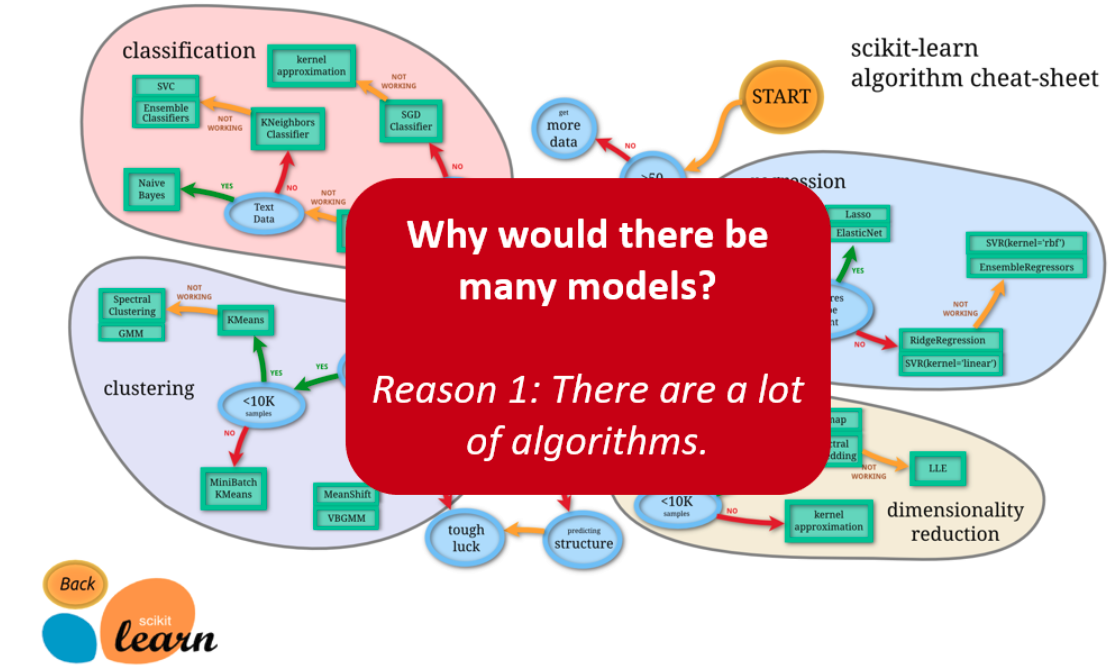

### Split training data into training and validation subset

In [22]:
X_train_sub, X_valid_sub, y_train_sub, y_valid_sub = train_test_split(
    X_train_select20,      # Training features         
    y_train,               # Training labels
    test_size=0.2,         # 20% are for VALIDATION
    random_state=rand_seed)

### Try Simple Linear Regression with default

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_sub, y_train_sub)

LinearRegression()

In [24]:
from scipy.stats import pearsonr

# Function for plotting true vs. predicted values
def plot_true_vs_prediction(model, X_train, y_train, X_valid, y_valid):
    
    ###############################
    # Apply model to the feature data (X) to make predictions (y)
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    ###############################
    # Calculate how well true y and predicted y are correlated
    pcc_train = str(pearsonr(y_train, y_train_pred)[0]**2)[:4]
    pcc_valid = str(pearsonr(y_valid, y_valid_pred)[0]**2)[:4]
    
    # Print out r2 values
    print(f'r2_score training   = {pcc_train}')
    print(f'r2_score validation = {pcc_valid}')

    # Plotting
    plt.figure(figsize=(8,4))
    plt.subplot(121)
    plt.title("Training performance")
    plt.plot(y_train, y_train_pred, ".", alpha=0.2)
    plt.xlabel("True y"); plt.ylabel("Predicted y")
    plt.subplot(122)
    plt.title("Training performance")
    plt.plot(y_valid, y_valid_pred, ".", color="orange", alpha=0.2)
    plt.xlabel("True y")
    
    plt.show()

r2_score training   = 0.24
r2_score validation = 0.29


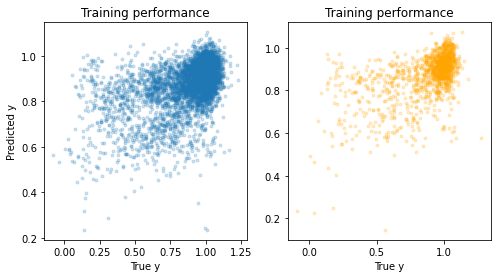

In [25]:
plot_true_vs_prediction(lin_reg, X_train_sub, y_train_sub, X_valid_sub, y_valid_sub)

### Try Support Vector Regressor with default

In [26]:
from sklearn.svm import SVR

sv_reg = SVR()

sv_reg.fit(X_train_sub, y_train_sub)

SVR()

r2_score training   = 0.67
r2_score validation = 0.46


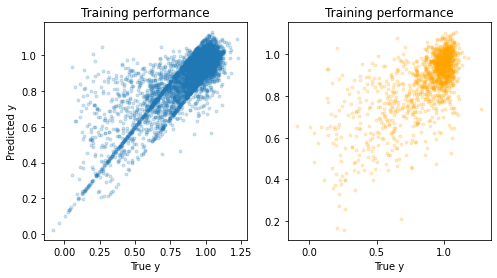

In [27]:
plot_true_vs_prediction(sv_reg, X_train_sub, y_train_sub, X_valid_sub, y_valid_sub)

### Try Random Forest regressor with default

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(oob_score=True) # Create a model object

rf_reg.fit(X_train_sub, y_train_sub) # Fit the training data to the model

RandomForestRegressor(oob_score=True)

r2_score training   = 0.95
r2_score validation = 0.59


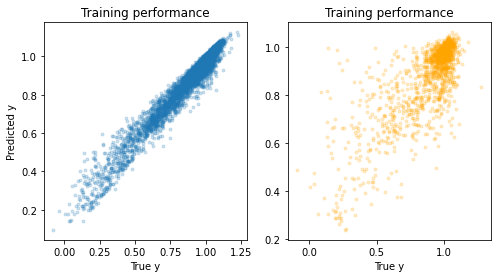

In [29]:
plot_true_vs_prediction(rf_reg, X_train_sub, y_train_sub, X_valid_sub, y_valid_sub)

<div class="alert alert-danger">
 <strong>CAUTION:</strong> The above are quick looks at which algorithms are better. But to do this formally, you'd need to go through Step 4.2 for every single algorithm you try.
</div>

## __4.2 Parameter tuning and cross-validation__

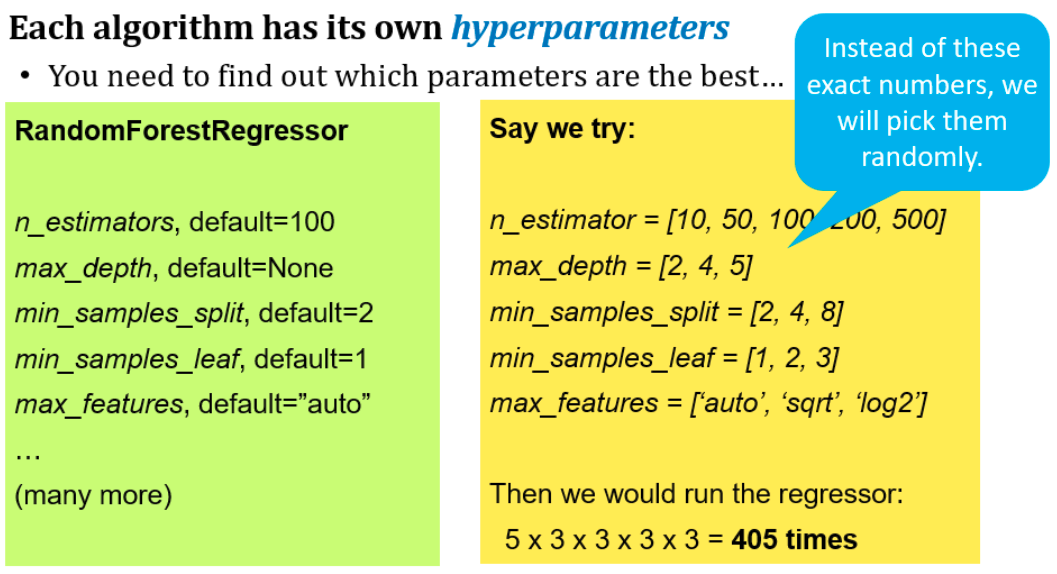

### Define ranges of parameters that will be tuned

In [30]:
from scipy.stats import randint

# Search the following parameters
param_grid = {
    "n_estimators": randint(low=20, high=200), # random integer from 20 to 200
    "max_depth"   : randint(low=2 , high=20),
    "max_features": ['auto', 'sqrt', 'log2']    # 3 options 
}

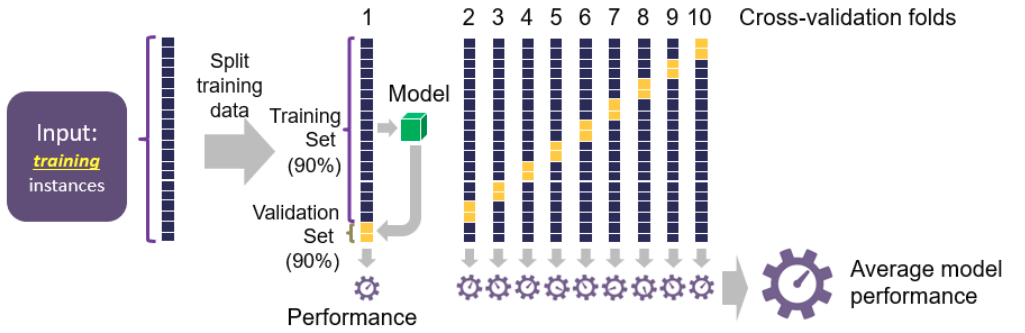

### Use RandomizedSearchCV to search parameters and do cross validation

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, r2_score

# Create model object
rf = RandomForestRegressor(oob_score=True)

# Make scorer
r2_scorer = make_scorer(r2_score)

# Create randomized search object
rnd_search = RandomizedSearchCV(
    rf,                                # Model used
    param_distributions=param_grid,    # Parameter distribution
    verbose=2,                         # Provide details on runs
    n_iter=200,                        # Search 200 parameter combinations
    cv=5,                              # Five-fold cross validation
    scoring=r2_scorer,                 # Scoring function
    random_state=rand_seed,            # Random seed number for reproducibility
    n_jobs=15)                         # Run on as many CPUs as you have

rnd_search.fit(X_train_select20, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:    3.6s
[Parallel(n_jobs=15)]: Done 132 tasks      | elapsed:   24.7s
[Parallel(n_jobs=15)]: Done 335 tasks      | elapsed:   56.8s
[Parallel(n_jobs=15)]: Done 618 tasks      | elapsed:  1.6min
[Parallel(n_jobs=15)]: Done 1000 out of 1000 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(oob_score=True),
                   n_iter=200, n_jobs=15,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EDBAB634C8>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EDBAB63608>},
                   random_state=20200729, scoring=make_scorer(r2_score),
                   verbose=2)

In [32]:
import joblib

# Save the model
joblib.dump(rnd_search, Path('./models/model_train_select20_rf_rnd_search.joblib'))

['models\\model_train_select20_rf_rnd_search.joblib']

### Look into the best model

In [33]:
# The best parameter combination
rnd_search.best_params_

{'max_depth': 19, 'max_features': 'auto', 'n_estimators': 141}

In [34]:
# The mean cross-validated score of the best estimator
rnd_search.best_score_

0.5494954629167607

<div class="alert alert-danger">
 <strong>CAUTION:</strong> Athough the performance after tuning/cross-validation is not better compareed to the default run (r2=0.59), this does not mean the default is always better.
</div>

## __4.3 Improving model__

<div class="alert alert-success"> 
<strong>Step 1. Question</strong>: Is this the right way to ask the question? Is this the right question?
</div>

<div class="alert alert-success"> 
<strong>Step 2. Data processing</strong>: Different ways of processing the data - e.g. scaling and imputing, ensuring there is no sysmatic errors in the data, and getting better data.
</div>

<div class="alert alert-success">
<strong>Step 3. Feature engineering</strong>: Inlucluding more features, transforming features, generating feature combintaions, or selecting best features
</div>

<div class="alert alert-success">
<strong>Step 4. Model/algorithm selection</strong>: Testing more algorithms, hyperparameters.
</div>

# __Step 5. Model application and interpretation__

## __5.1 Evaluate model with an independent testing data__

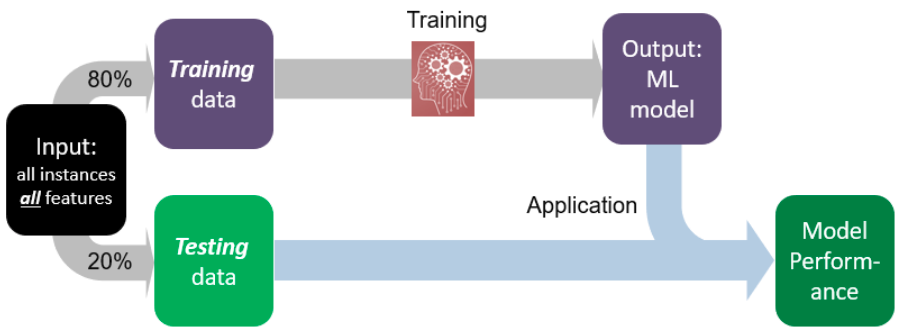

### Get the best model from the randomized search

In [35]:
best_model = rnd_search.best_estimator_
best_model

RandomForestRegressor(max_depth=19, n_estimators=141, oob_score=True)

### Apply model to the test set features to make predictions

Text(0, 0.5, 'Predicted y')

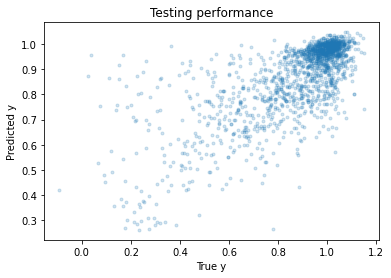

In [36]:
y_test_pred = best_model.predict(X_test_select20)

plt.title("Testing performance")
plt.plot(y_test, y_test_pred, ".", alpha=0.2)
plt.xlabel("True y"); plt.ylabel("Predicted y")

## __5.2 Apply model to new cases__

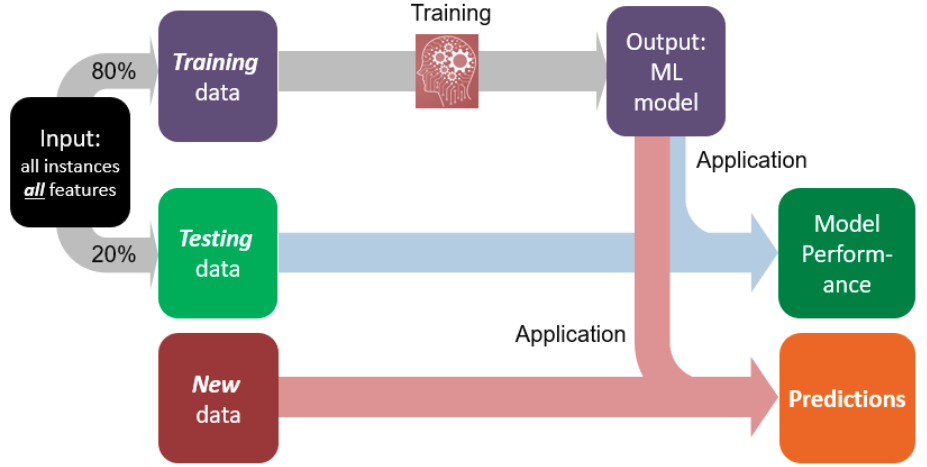

## __5.3 Learn from the model__

### Examine the relative importance of features

In [37]:
# selected features
feat20

['GOslim_%_overlap',
 'full_GO_%_overlap',
 'PPI_total',
 'PPI_%_overlap',
 '37C_ORF_Chz1_reg_bind_max',
 '37C_UAS1_Jhd2_reg_bind_min',
 '37C_UAS1_Xbp1_reg_bind_avg',
 '25C_UAS1_Yap1_reg_bind_min',
 'phosphorylation_of_PolII_CDT_GO_num',
 'nucleotidyltransferase_activity_goslim_num',
 'SAM_biosyn_process_GO_num',
 'transferase_activity_goslim_num',
 '25C_TSS_Rpb2_reg_bind_pair_total',
 '25C_ORF2_Ssl1_reg_bind_difference',
 '25C_ORF_Zms1_reg_bind_max',
 '25C_TSS_Ssl1_reg_bind_min',
 '25C_TSS_Ncb2_reg_bind_difference',
 'GO_PCA_Dim1',
 'GO_PCA_Dim3',
 'GO_PCA_Dim4']

Text(0.5, 0, 'Feature importance')

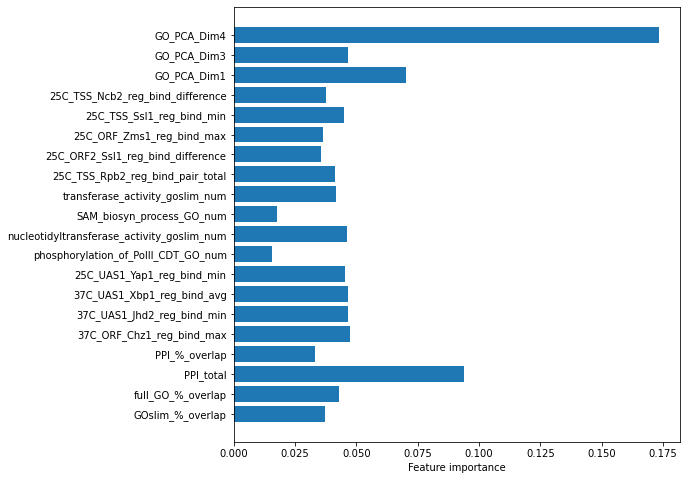

In [38]:
import numpy as np

importance    = best_model.feature_importances_                        

fig, ax  = plt.subplots(figsize=(8,8))
y_pos    = np.asarray(range(len(feat20))) # For plotting y positions      

# bar plot horizontal
ax.barh(y_pos, importance) 

ax.set_yticks(y_pos)
ax.set_yticklabels(feat20)
ax.set_xlabel("Feature importance")

<div class="alert alert-danger">
 <strong>CAUTION:</strong> There are a number of strategies to learn more from the model which cannot be further explored here due to time constraints.
</div>